In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/ML/hw4')

## Import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy # scipy.special.expit
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Helper Functions

In [4]:
def results_to_csv(y_test, name):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv(name+'.csv', index_label='Id')
    
def sigmoid(x):
  return scipy.special.expit(x)

def normalize(mu, sigma, x):
  return (x - mu)/sigma

## Process data

In [7]:
# load data
data = loadmat(f"./data.mat")
# data.keys()
y = data['y']
X = data['X']
X_test = data['X_test']
print(y.shape, X.shape, X_test.shape)

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X = normalize(mu, sigma, X)
X_test = normalize(mu, sigma, X_test)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

(6000, 1) (6000, 12) (497, 12)


## Model: Logistic Regression

In [5]:
class LogisticRegression():
    def __init__(self, lr, C, epochs, rule="BGD", lr_decay=False):
      self.lr = lr
      self.epochs = epochs
      self.C = C # regularization parameter
      self.rule = rule
      self.lr_decay = lr_decay


    def loss(self, y, y_pred):
      return np.sum(- y * np.log(y_pred + 1e-8) - (1-y) * np.log(1 - y_pred + 1e-8)) + self.C * (self.w.T @ self.w)/2
    
    def fit(self, X, y):
      loss_list = []
      # initialize weights
      w = np.random.normal(loc=0.0, scale=1.0, size=(X.shape[1],))
      b = 0
      self.w = np.insert(w, 0, b, axis=0)
      # self.w = np.ones(X.shape[1]+1)
      # add fake dimension
      X = np.insert(X, 0, 1, axis=1)
      y = y.reshape((y.shape[0], ))
      if self.rule=="BGD":
        for i in range(self.epochs):
          y_pred = sigmoid(X @ self.w)
          loss_list.append(self.loss(y, y_pred))
          w_grad = X.T @ (y_pred - y) + self.C * self.w
          self.w = self.w - self.lr * w_grad
      else:
        delta = self.lr
        for i in range(self.epochs):
          for j in range(X.shape[0]):
            y_pred = sigmoid(X[j].T @ self.w)
            if self.lr_decay:
              iter = i * X.shape[0] + j  +1
              self.lr = delta / iter
            w_grad = X[j] * (y_pred - y[j]) + self.C * self.w
            self.w = self.w - self.lr * w_grad
            # calculate cost on whole train_set
            y_pred = sigmoid(X @ self.w)
            loss_list.append(self.loss(y, y_pred))
      plt.figure()                   
      plt.plot(loss_list,'b',label = 'loss')       
      plt.ylabel('loss')
      plt.xlabel('iterations')
      plt.legend()

    def predict(self, X):
      X = np.insert(X, 0, 1, axis=1)
      y_pred = sigmoid(X @ self.w)
      return (y_pred > 0.5).astype(int)

## Train model

### q3.2 BGD

Using BGD:
lr set to 0.001, C set to 0.01, acc 0.9908333333333333


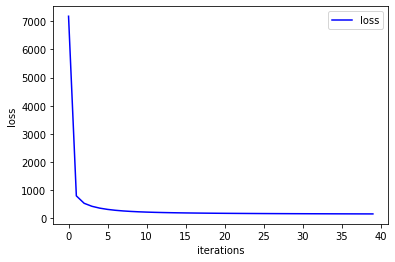

In [ ]:
# for lr in [0.001, 0.01]:
#   for C in [0.001, 0.01]:
C = 0.01
lr = 0.001
model = LogisticRegression(lr, C, 40)
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
acc = accuracy_score(y_val, y_pred_val)
print(f"Using BGD:\nlr set to {lr}, C set to {C}, acc {acc}")


### q3.3 SGD

Using SGD:
lr set to 0.1, C set to 0.01, acc 0.9908333333333333


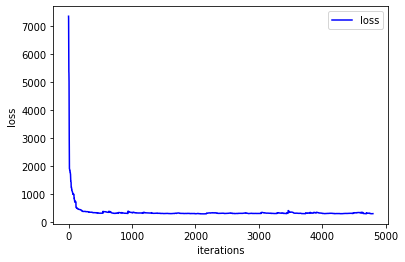

In [ ]:
# for lr in [0.001, 0.01]:
#   for C in [0.001, 0.01]:
C = 0.01
lr = 0.1
model = LogisticRegression(lr, C, 1, "SGD")
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
acc = accuracy_score(y_val, y_pred_val)
print(f"Using SGD:\nlr set to {lr}, C set to {C}, acc {acc}")


### q3.4 LR decay

Using SGD:
Delta set to 10, C set to 0.01, acc 0.9833333333333333


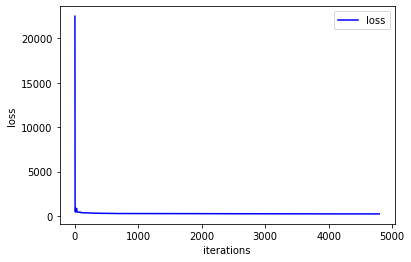

In [ ]:
# for lr in [0.001, 0.01]:
#   for C in [0.001, 0.01]:
C = 0.01
delta = 10
model = LogisticRegression(delta, C, 1, "SGD", lr_decay=True)
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
acc = accuracy_score(y_val, y_pred_val)
print(f"Using SGD:\nDelta set to {delta}, C set to {C}, acc {acc}")


### q3.5 Improve the performance of model


#### Attempt 1:delete features

In [ ]:
# evaluate the importance of features
print(model.w)

[-3.32257779  0.39865405  1.44134369 -0.06231411 -1.83561014  0.60223554
 -0.11690942 -2.11726179  2.94109762  0.46743809  0.79994031  0.7479095
  0.38043453]


In [ ]:
y = data['y']
X = data['X']
X_test = data['X_test']

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X = normalize(mu, sigma, X)
X_test = normalize(mu, sigma, X_test)

X_del = np.delete(X, (0, 8), axis=1)
X_test_del = np.delete(X_test, (0, 8), axis=1)
# X_del = X
# X_test_del = X_test
print(X_del.shape, X_test_del.shape)
X_train_del, X_val_del, y_train, y_val = train_test_split(X_del, y, test_size=0.2, random_state=13)

(6000, 10) (497, 10)


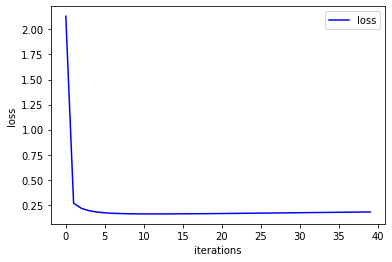

In [ ]:
# for lr in [0.001, 0.01]:
#   for C in [0.001, 0.01]:
C = 0.01
lr = 0.001
model = LogisticRegression(lr, C, 40)

model.fit(X_train_del, y_train)
y_pred_test = model.predict(X_test_del)
results_to_csv(y_pred_test, "lr_del")

# model.fit(X_train_del, y_train)
# y_pred_val = model.predict(X_val_del)
# acc = accuracy_score(y_val, y_pred_val)
# print(f"Using BGD:\nlr set to {lr}, C set to {C}, acc {acc}")

#### Attempt 2: lift the dims

In [ ]:
y = data['y']
X = data['X']
X_test = data['X_test']
X_aug = X
X_test_aug = X_test
for i in range(X.shape[1]):
  for j in range(X.shape[1]):
    X_aug = np.insert(X_aug, -1, X_aug[:, i]*X_aug[:, j], axis=1)
    X_test_aug = np.insert(X_test_aug, -1, X_test_aug[:, i]*X_test_aug[:, j], axis=1)
print(X_aug.shape, X_test_aug.shape)

mu = np.mean(X_aug, axis=0)
sigma = np.std(X_aug, axis=0)
X_aug = normalize(mu, sigma, X_aug)
X_test_aug = normalize(mu, sigma, X_test_aug)


X_train_aug, X_val_aug, y_train, y_val = train_test_split(X_aug, y, test_size=0.1, random_state=13)

(6000, 156) (497, 156)


Using BGD:
lr set to 0.001, C set to 0.1, acc 0.9933333333333333


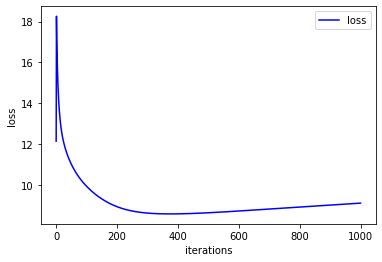

In [ ]:
C = 0.1
lr = 0.001
model = LogisticRegression(lr, C, 1000)
model.fit(X_aug, y)
y_pred_test = model.predict(X_test_aug)
results_to_csv(y_pred_test, "wine_HD")

# model.fit(X_train_aug, y_train)
# y_pred_val = model.predict(X_val_aug)
# acc = accuracy_score(y_val, y_pred_val)
# print(f"Using BGD:\nlr set to {lr}, C set to {C}, acc {acc}")

#### Attempt 3: delete features & lift the dims (Best perf)

In [9]:
y = data['y']
X = data['X']
X_test = data['X_test']
# delete less distincitive features
X_del = np.delete(X, (0, 8), axis=1)
X_test_del = np.delete(X_test, (0, 8), axis=1)
# 1-D to 2-D
X_aug = X_del
X_test_aug = X_test_del
for i in range(X_del.shape[1]):
  for j in range(X_del.shape[1]):
    X_aug = np.insert(X_aug, -1, X_aug[:, i]*X_aug[:, j], axis=1)
    X_test_aug = np.insert(X_test_aug, -1, X_test_aug[:, i]*X_test_aug[:, j], axis=1)
print(X_aug.shape, X_test_aug.shape)

mu = np.mean(X_aug, axis=0)
sigma = np.std(X_aug, axis=0)
X_aug = normalize(mu, sigma, X_aug)
X_test_aug = normalize(mu, sigma, X_test_aug)


X_train_aug, X_val_aug, y_train, y_val = train_test_split(X_aug, y, test_size=0.1, random_state=13)

(6000, 110) (497, 110)


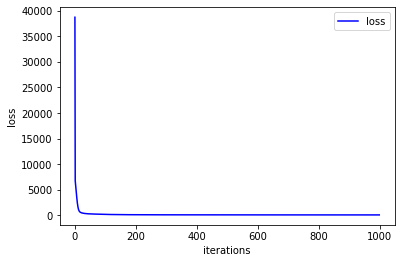

In [11]:
C = 0.1
lr = 0.001
model = LogisticRegression(lr, C, 1000)
model.fit(X_aug, y)
y_pred_test = model.predict(X_test_aug)
results_to_csv(y_pred_test, "wine_HD_DEL")

# model.fit(X_train_aug, y_train)
# y_pred_val = model.predict(X_val_aug)
# acc = accuracy_score(y_val, y_pred_val)
# print(f"Using BGD:\nlr set to {lr}, C set to {C}, acc {acc}")